In [ ]:
#                           Gaussian Plume Models (The TOY model)
#                             Author    ::   Subhadeep Maishal
#                                Date  ::  13-09-2024

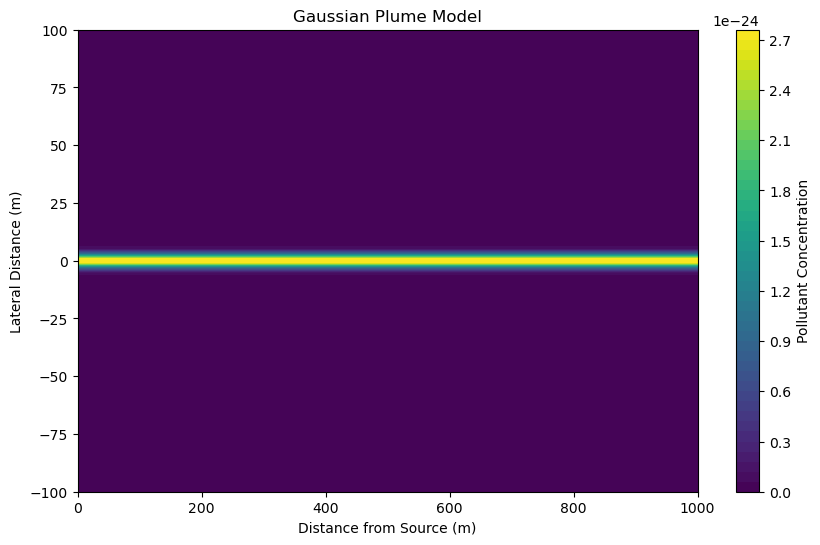

In [24]:
import numpy as np
import matplotlib.pyplot as plt

def gaussian_plume(x, y, Q, u, H, sigma_y, sigma_z):
    """
    Calculate the concentration of pollutants in a Gaussian plume model.
    
    Parameters:
    x (numpy array): Distance from the source along the x-axis.
    y (numpy array): Distance from the centerline of the plume along the y-axis.
    Q (float): Emission rate (pollutant release rate).
    u (float): Wind speed.
    H (float): Stack height.
    sigma_y (float): Standard deviation of the plume in the y-direction.
    sigma_z (float): Standard deviation of the plume in the z-direction.
    
    Returns:
    numpy array: Concentration of pollutants.
    """
    C = (Q / (2 * np.pi * sigma_y * sigma_z * u)) * np.exp(-0.5 * (y / sigma_y) ** 2) * np.exp(-0.5 * ((H / sigma_z) ** 2))
    return C

# Parameters
Q = 1.0           # Emission rate (units: kg/s)
u = 5.0           # Wind speed (units: m/s)
H = 10.0          # Stack height (units: m)
sigma_y = 2.0     # Standard deviation in the y-direction (units: m)
sigma_z = 1.0     # Standard deviation in the z-direction (units: m)

# Grid setup
x = np.linspace(0, 1000, 100)   # Distance from the source (x-axis)
y = np.linspace(-100, 100, 100)  # Lateral distance (y-axis)
X, Y = np.meshgrid(x, y)
Z = gaussian_plume(X, Y, Q, u, H, sigma_y, sigma_z)

# Plotting
plt.figure(figsize=(10, 6))
contour = plt.contourf(X, Y, Z, levels=50, cmap='viridis')
plt.colorbar(contour, label='Pollutant Concentration')
plt.title('Gaussian Plume Model')
plt.xlabel('Distance from Source (m)')
plt.ylabel('Lateral Distance (m)')
plt.show()


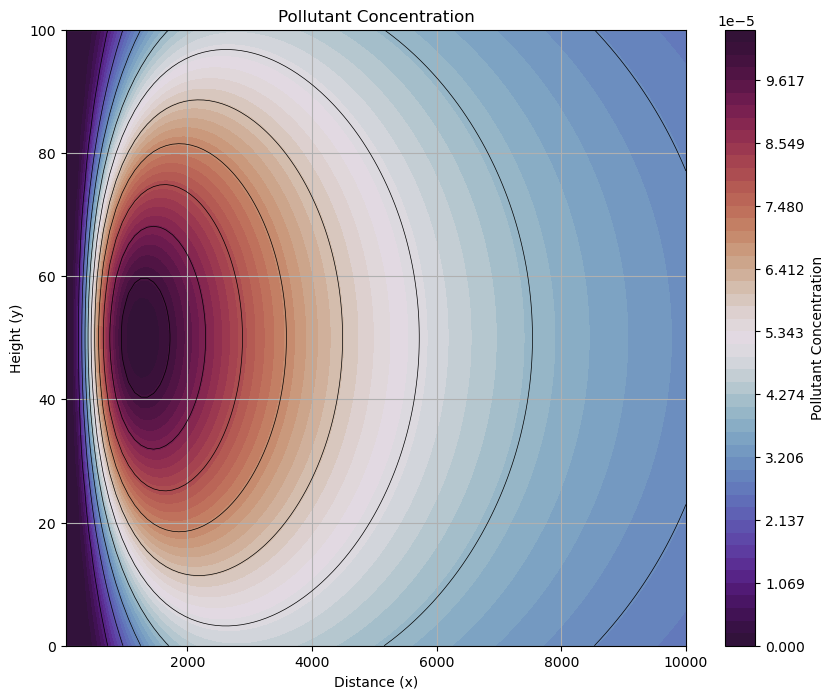

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

def gaussian_plume(x, y, Q, u, H, sigma_y, sigma_z):
    """
    Calculate the concentration of pollutants in a Gaussian plume model.
    """
    C = (Q / (2 * np.pi * sigma_y * sigma_z * u)) * np.exp(-0.5 * (y / sigma_y) ** 2) * np.exp(-0.5 * (H / sigma_z) ** 2)
    return C

# Parameters
Dy = 0.2
Dz = 1
v = 0.5
lambda_ = 0
Q = 1
xstack = 0
ystack = 50
xmin = 50
xmax = 10000
ymin = 0
ymax = 100
H = 100
z = 0
gcont = 2

# Execution
x, y = np.meshgrid(np.linspace(xmin, xmax, 100), np.linspace(ymin, ymax, 100))
c = np.zeros(x.shape)

# Assuming Q is an array with one element as in the MATLAB code
Q = np.array([Q])
xstack = np.array([xstack])
ystack = np.array([ystack])
H = np.array([H])

for i in range(len(Q)):
    xx = x - xstack[i]
    yy = y - ystack[i]
    term1 = Q[i] / (4 * np.pi * xx * np.sqrt(Dy * Dz))
    term2 = np.exp(-v * yy ** 2 / (4 * Dy * xx))
    term3 = np.exp(-v * (z - H[i]) ** 2 / (4 * Dz * xx)) + np.exp(-v * (z + H[i]) ** 2 / (4 * Dz * xx))
    term4 = np.exp(-lambda_ * xx / v)
    c += term1 * term2 * term3 * term4

# Output
if gcont:
    plt.figure(figsize=(10, 8))
    contour = plt.contourf(x, y, c, cmap='twilight_shifted', levels=np.linspace(np.min(c), np.max(c), 50))
    plt.colorbar(contour, label='Pollutant Concentration')
    plt.contour(x, y, c, levels=10, colors='black', linewidths=0.5)
    plt.title('Pollutant Concentration')
    plt.xlabel('Distance (x)')
    plt.ylabel('Height (y)')
    plt.grid(True)
    plt.show()


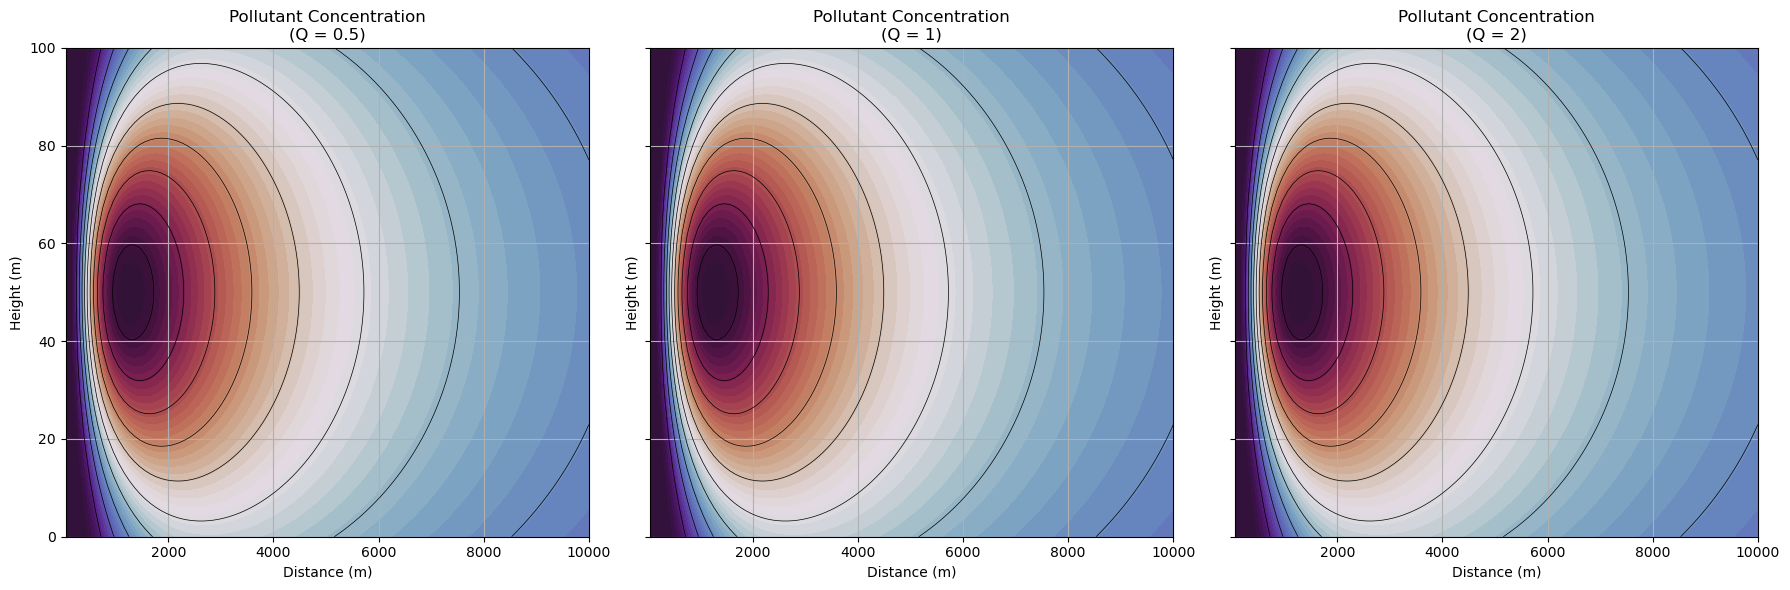

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

def gaussian_plume(x, y, Q, u, H, sigma_y, sigma_z):
    """
    Calculate the concentration of pollutants in a Gaussian plume model.
    """
    C = (Q / (2 * np.pi * sigma_y * sigma_z * u)) * np.exp(-0.5 * (y / sigma_y) ** 2) * np.exp(-0.5 * (H / sigma_z) ** 2)
    return C

# Parameters
Dy = 0.2
Dz = 1
v = 0.5
lambda_ = 0
xstack = 0
ystack = 50
xmin = 50
xmax = 10000
ymin = 0
ymax = 100
H = 100
z = 0

# Different pollution levels
Q_values = [0.5, 1, 2]

# Create a figure with 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharex=True, sharey=True)

for ax, Q in zip(axes, Q_values):
    # Execution
    x, y = np.meshgrid(np.linspace(xmin, xmax, 100), np.linspace(ymin, ymax, 100))
    c = np.zeros(x.shape)
    
    # Gaussian plume calculation
    xx = x - xstack
    yy = y - ystack
    term1 = Q / (4 * np.pi * xx * np.sqrt(Dy * Dz))
    term2 = np.exp(-v * yy ** 2 / (4 * Dy * xx))
    term3 = np.exp(-v * (z - H) ** 2 / (4 * Dz * xx)) + np.exp(-v * (z + H) ** 2 / (4 * Dz * xx))
    term4 = np.exp(-lambda_ * xx / v)
    c += term1 * term2 * term3 * term4
    
    # Plot
    ax.contourf(x, y, c, cmap='twilight_shifted', levels=np.linspace(np.min(c), np.max(c), 50))
    ax.contour(x, y, c, levels=10, colors='black', linewidths=0.5)
    ax.set_title(f'Pollutant Concentration\n(Q = {Q})')
    ax.set_xlabel('Distance (m)')
    ax.set_ylabel('Height (m)')
    ax.grid(True)
    
# Adjust layout
plt.tight_layout()
plt.show()


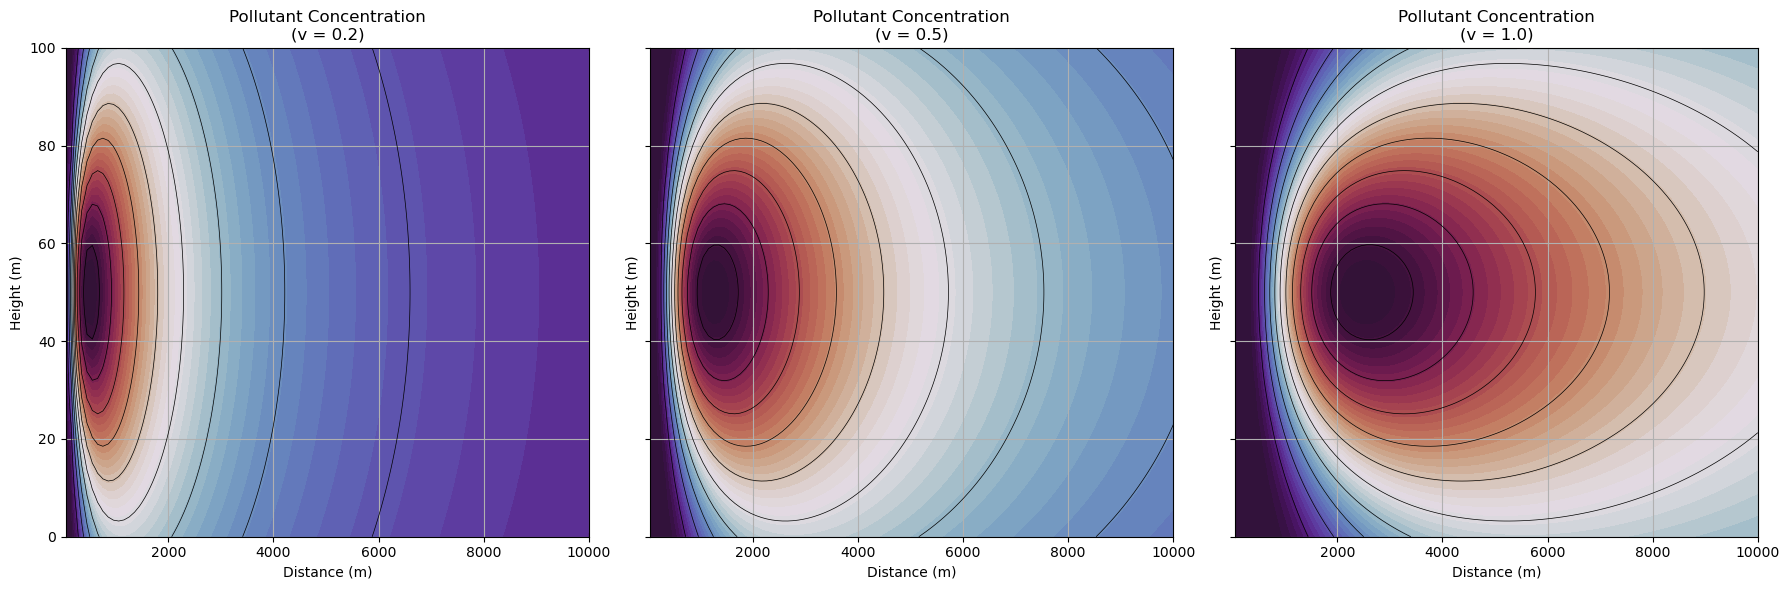

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

def gaussian_plume(x, y, Q, u, H, sigma_y, sigma_z, v):
    """
    Calculate the concentration of pollutants in a Gaussian plume model.
    """
    C = (Q / (2 * np.pi * sigma_y * sigma_z * u)) * np.exp(-0.5 * (y / sigma_y) ** 2) * np.exp(-0.5 * (H / sigma_z) ** 2)
    return C

# Parameters
Dy = 0.2
Dz = 1
lambda_ = 0
xstack = 0
ystack = 50
xmin = 50
xmax = 10000
ymin = 0
ymax = 100
H = 100
z = 0

# Different values for v
v_values = [0.2, 0.5, 1.0]

# Create a figure with 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharex=True, sharey=True)

for ax, v in zip(axes, v_values):
    # Execution
    x, y = np.meshgrid(np.linspace(xmin, xmax, 100), np.linspace(ymin, ymax, 100))
    c = np.zeros(x.shape)
    
    # Gaussian plume calculation
    xx = x - xstack
    yy = y - ystack
    term1 = 1 / (4 * np.pi * xx * np.sqrt(Dy * Dz))
    term2 = np.exp(-v * yy ** 2 / (4 * Dy * xx))
    term3 = np.exp(-v * (z - H) ** 2 / (4 * Dz * xx)) + np.exp(-v * (z + H) ** 2 / (4 * Dz * xx))
    term4 = np.exp(-lambda_ * xx / v)
    c += term1 * term2 * term3 * term4
    
    # Plot
    contour = ax.contourf(x, y, c, cmap='twilight_shifted', levels=np.linspace(np.min(c), np.max(c), 50))
    ax.contour(x, y, c, levels=10, colors='black', linewidths=0.5)
    ax.set_title(f'Pollutant Concentration\n(v = {v})')
    ax.set_xlabel('Distance (m)')
    ax.set_ylabel('Height (m)')
    ax.grid(True)
    
# Adjust layout
plt.tight_layout()
plt.show()


In [ ]:
#                                        